In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv("Mall_Customers.csv")
df = data.copy()
df = df.drop("CustomerID",axis = 1)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [6]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


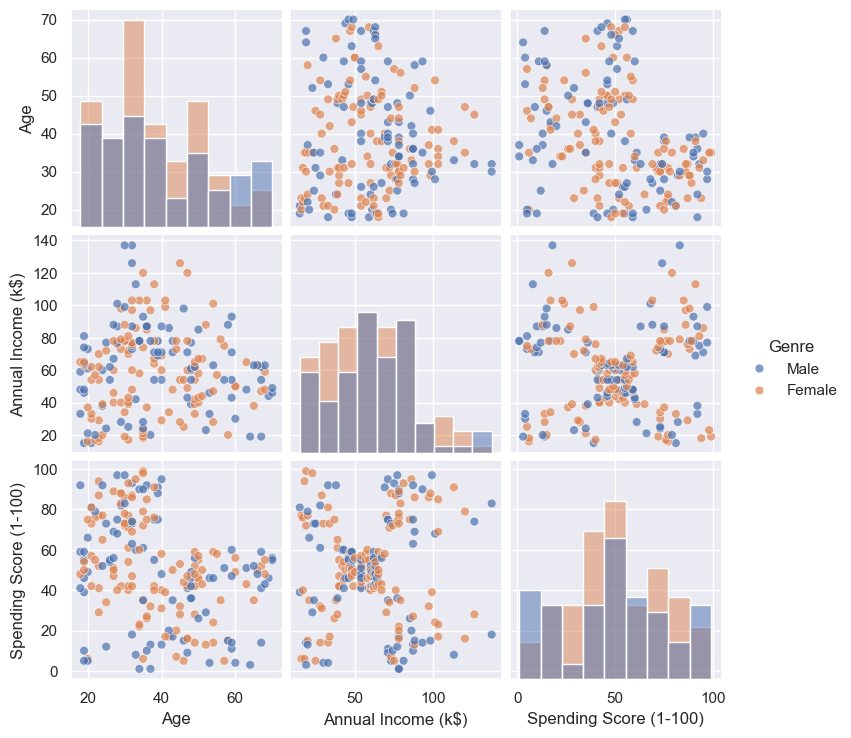

In [7]:
sns.pairplot(
    df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']],
    hue='Genre',
    diag_kind='hist',
    plot_kws={'alpha': 0.7, 's': 40}
)

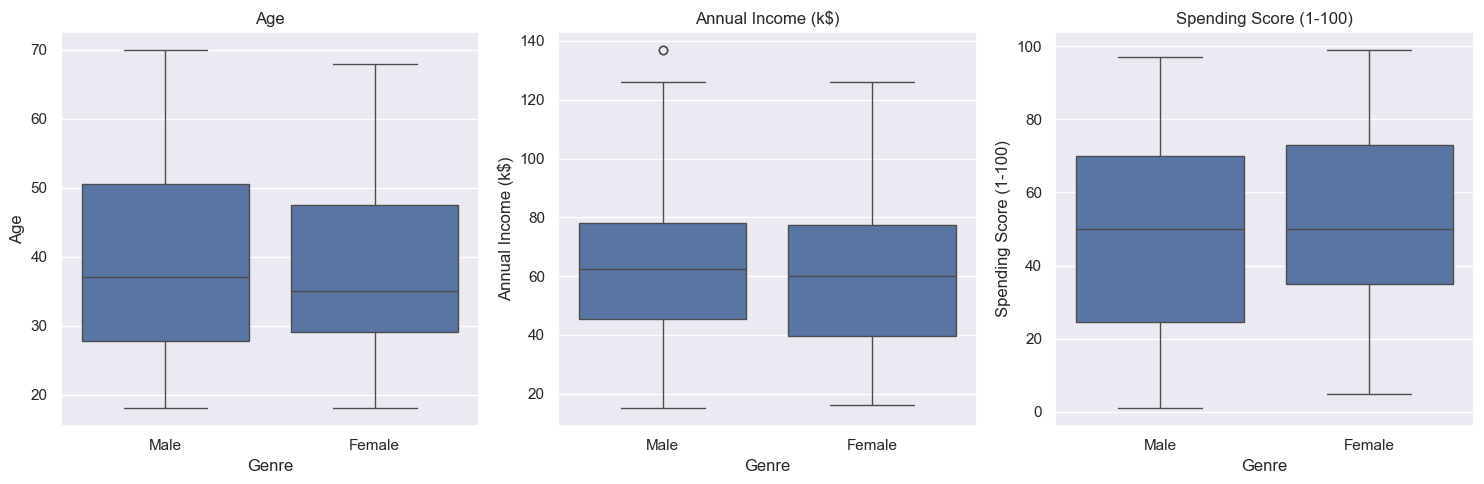

In [8]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(X, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='Genre', y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

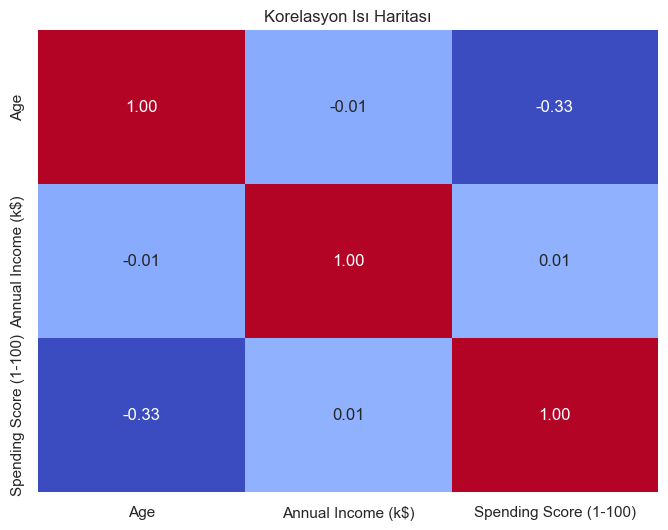

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm",cbar = False)
plt.title("Korelasyon Isı Haritası")
plt.show()

# Standartlaştırma

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dendogramlar

In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
methods = ['ward', 'complete', 'average', 'single']
results = {}

for m in methods:
    scores = {}
    for k in range(2, 7):
        model = AgglomerativeClustering(n_clusters=k, linkage=m)
        labels = model.fit_predict(X_scaled)
        sil = silhouette_score(X_scaled, labels)
        scores[k] = sil
    results[m] = scores

results

{'ward': {2: 0.31795733680759597,
  3: 0.32148866683112387,
  4: 0.3614512741691407,
  5: 0.39002826186267214,
  6: 0.4201169558789579},
 'complete': {2: 0.23302480062700373,
  3: 0.28384379984299635,
  4: 0.39013868362208315,
  5: 0.3999821356530837,
  6: 0.37456111132591957},
 'average': {2: 0.3249364218857763,
  3: 0.33996187294272745,
  4: 0.3839056982213577,
  5: 0.40956924875250705,
  6: 0.38957308601543233},
 'single': {2: 0.2513714457428386,
  3: 0.16112175506862975,
  4: 0.042500057406978424,
  5: 0.0030237255251292527,
  6: -0.04275003780616146}}

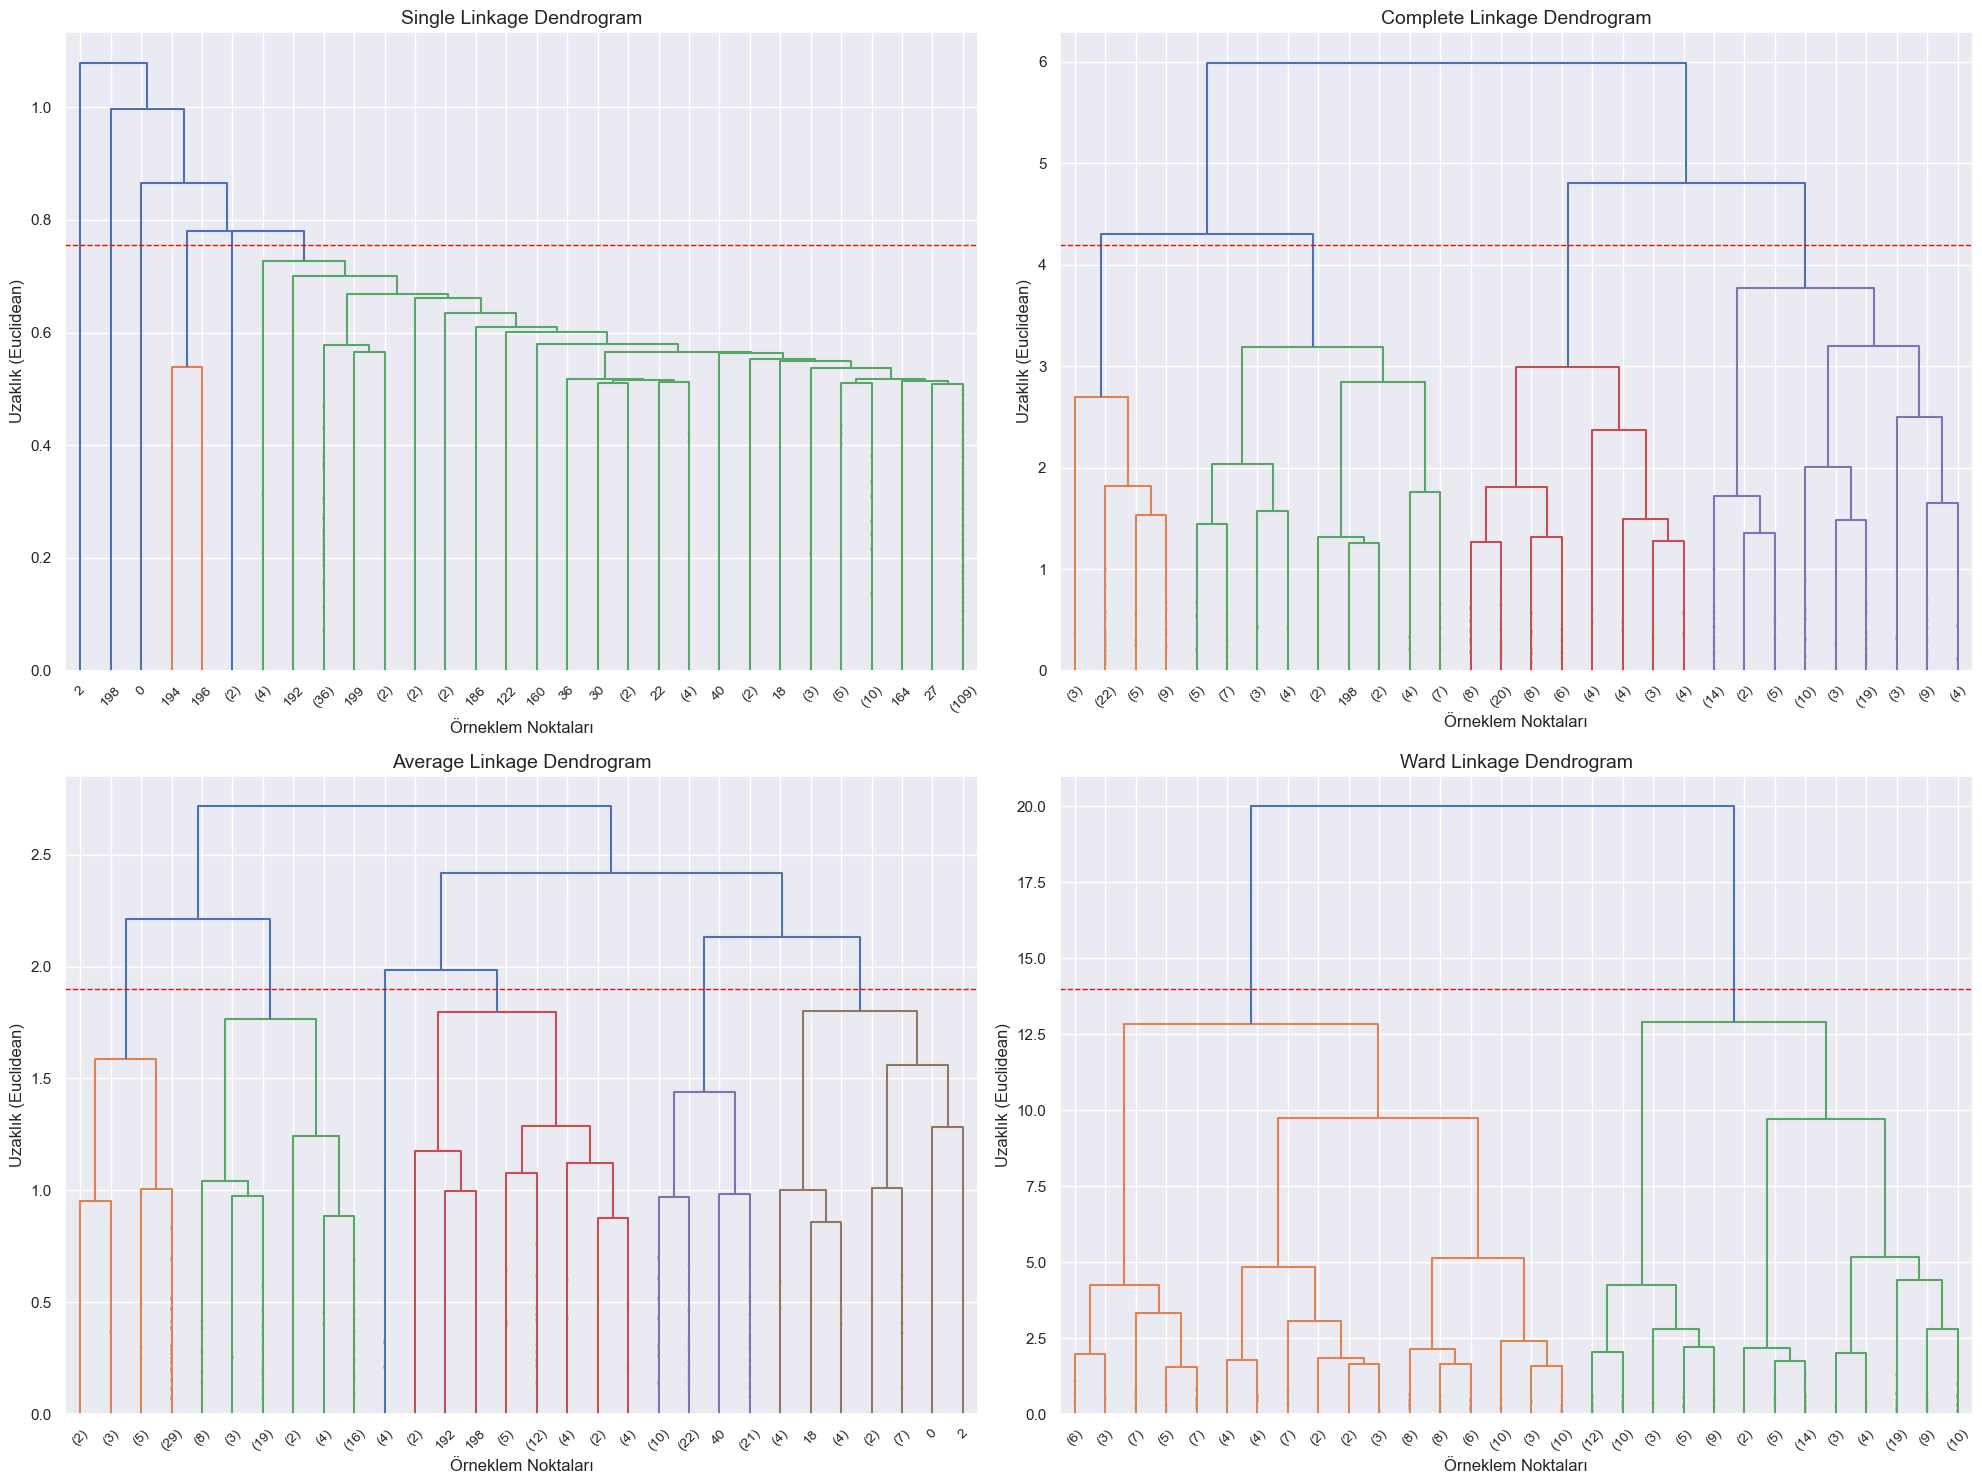

In [14]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# İncelemek istediğimiz yöntemler
methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(20, 15))

for i, m in enumerate(methods, 1):
    # 1. Her yöntem için Linkage Matrisini hesapla
    Z = linkage(X_scaled, method=m, metric='euclidean')
    
    # 2. Alt grafiği ayarla
    plt.subplot(2, 2, i)
    
    # Otomatik bir eşik değeri belirleyelim (görsellik için)
    # Genellikle en yüksek mesafenin %70'i varsayılan eşiktir
    default_threshold = 0.7 * max(Z[:, 2])
    
    dendrogram(
        Z,
        truncate_mode='lastp',
        p=30,                   # Dallanma sayısı (daha sade görünüm için 30 yaptık)
        leaf_rotation=45.,
        leaf_font_size=10.,
        show_contracted=True,
        color_threshold=default_threshold # Kümeleri renklendirme sınırı
    )
    
    # Kesme Çizgisi (Renklendirme sınırına çizgi çekiyoruz)
    plt.axhline(y=default_threshold, c='red', lw=1, linestyle='--')
    
    plt.title(f'{m.capitalize()} Linkage Dendrogram', fontsize=14)
    plt.xlabel('Örneklem Noktaları')
    plt.ylabel('Uzaklık (Euclidean)')

plt.tight_layout()
plt.show()

"Bu çalışmada Hiyerarşik Kümeleme için bağlantı (linkage) yöntemi olarak Ward Metodu tercih edilmiştir. Bunun temel nedenleri şunlardır:

Varyans Minimizasyonu: Diğer yöntemler (Single, Complete vb.) noktalar arası mesafeye odaklanırken, Ward metodu kümeler içindeki varyansı (çeşitliliği) en aza indirmeyi hedefler. Bu yaklaşım, müşteri segmentasyonu gibi çalışmalarda daha homojen, derli toplu ve küresel kümeler elde etmemizi sağlar.

Gürültüye Dayanıklılık: Analiz aşamasında oluşturduğumuz Dendrogramlar incelendiğinde, 'Single Linkage' (Tek Bağlantı) yönteminin veri setindeki aykırı değerlerden etkilenerek "zincirleme" (chaining) etkisi yarattığı ve düzensiz yapılar oluşturduğu gözlemlenmiştir. Ward metodu ise veri setini daha dengeli bir şekilde ayrıştırarak en kararlı yapıyı sunmuştur."

"Optimal küme sayısının belirlenmesinde hem istatistiksel metrikler hem de iş bilgisi (domain knowledge) birlikte değerlendirilmiştir:

Dendrogram Analizi: Ward metodu ile oluşturulan dendrogram grafiğinde, kümeler arası mesafeyi temsil eden dikey çizgiler incelendiğinde, en belirgin ayrışmanın 5 ana grup seviyesinde gerçekleştiği görülmüştür.

İş Mantığı ve Yorumlanabilirlik: Silhouette skoru matematiksel olarak 6 kümeyi işaret etse de, 5 küme seçimi müşteri davranışları açısından çok daha anlamlı profiller ortaya çıkarmaktadır. Yıllık Gelir ve Harcama Skoru değişkenleri çaprazlandığında bu 5 grup, pazarlama stratejilerine doğrudan dönüştürülebilir niteliktedir:

Düşük Gelir - Düşük Harcama (Temkinli Müşteriler)

Düşük Gelir - Yüksek Harcama (Dikkatsiz Müşteriler)

Orta Gelir - Orta Harcama (Standart Müşteriler)

Yüksek Gelir - Düşük Harcama (Tasarruflu Müşteriler)

Yüksek Gelir - Yüksek Harcama (Hedef/VIP Müşteriler)"

# Algoritma Oluşumu

In [15]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, linkage='ward', metric='euclidean')
y_hc = hc.fit_predict(X_scaled)
df_final = df.copy()
df_final['Cluster'] = y_hc

In [16]:
cluster_stats = df_final.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].agg(['mean', 'min', 'max', 'std', 'count'])
cluster_stats

Age                          Annual Income (k$)           \
              mean min max        std count               mean min  max   
Cluster                                                                   
0        26.560606  18  45   7.043008    66          47.363636  15   81   
1        56.400000  43  70   8.373117    45          55.288889  38   79   
2        32.692308  27  40   3.728650    39          86.538462  69  137   
3        43.892857  32  59   8.337063    28          91.285714  71  137   
4        44.318182  19  67  12.800247    22          25.772727  15   39   

                         Spending Score (1-100)                           
               std count                   mean min max        std count  
Cluster                                                                   
0        18.328319    66              56.787879   5  99  20.628222    66  
1         9.834129    45              48.355556  35  60   6.869417    45  
2        16.312485    39              82.128205  63  97   9.364489    39  
3        16.915601    28              16.678571   1  39   8.973432    28  
4         7.646548    22              20.272727   3  40  12.947446    22

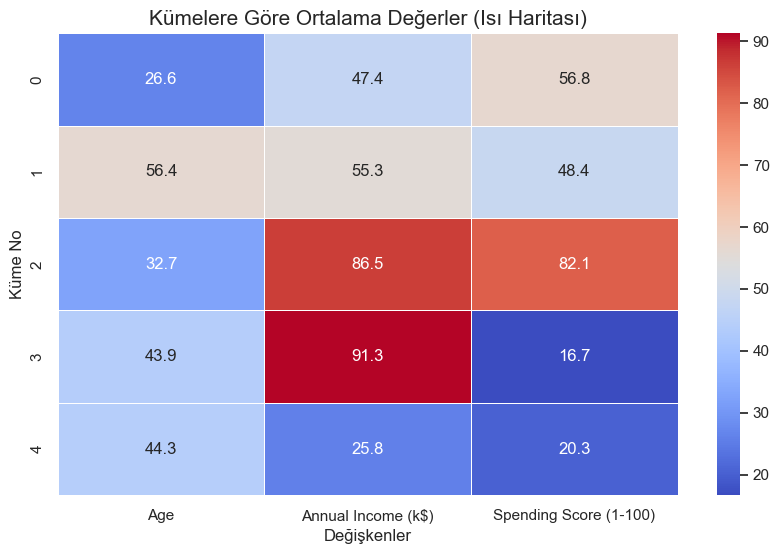

In [17]:
cluster_means = df_final.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(
    cluster_means, 
    annot=True,       
    fmt=".1f",        
    cmap="coolwarm",  
    linewidths=.5     
)

plt.title('Kümelere Göre Ortalama Değerler (Isı Haritası)', fontsize=15)
plt.ylabel('Küme No', fontsize=12)
plt.xlabel('Değişkenler', fontsize=12)
plt.show()



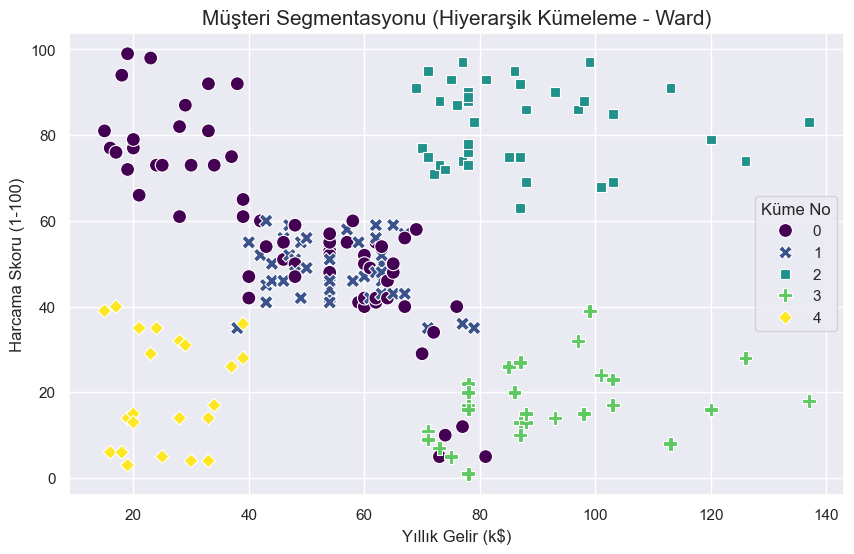

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    data=df_final, 
    hue='Cluster', 
    palette='viridis', 
    s=100,             
    style='Cluster'    
)

plt.title('Müşteri Segmentasyonu (Hiyerarşik Kümeleme - Ward)', fontsize=15)
plt.xlabel('Yıllık Gelir (k$)', fontsize=12)
plt.ylabel('Harcama Skoru (1-100)', fontsize=12)
plt.legend(title='Küme No')
plt.show()



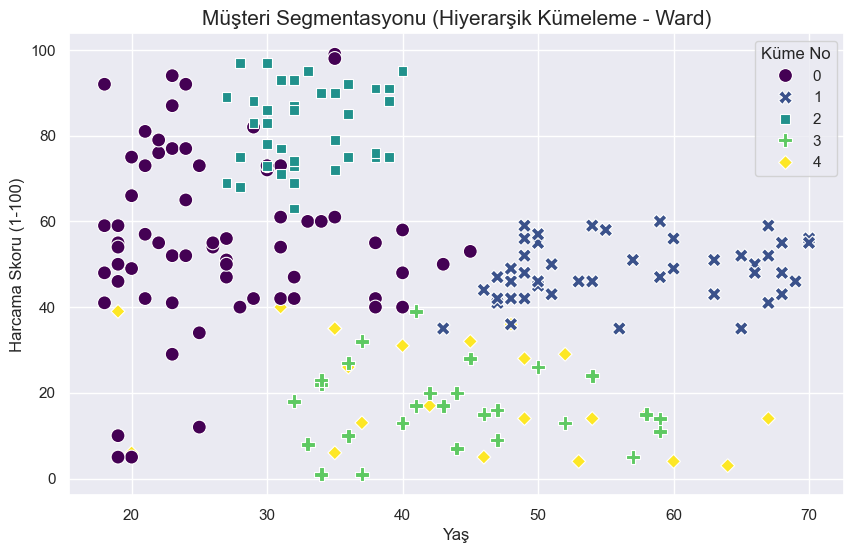

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Age", 
    y='Spending Score (1-100)', 
    data=df_final, 
    hue='Cluster', 
    palette='viridis', 
    s=100,             
    style='Cluster'    
)

plt.title('Müşteri Segmentasyonu (Hiyerarşik Kümeleme - Ward)', fontsize=15)
plt.xlabel('Yaş', fontsize=12)
plt.ylabel('Harcama Skoru (1-100)', fontsize=12)
plt.legend(title='Küme No')
plt.show()

C:\Users\rubar\AppData\Local\Temp\ipykernel_12852\3300319397.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Age', data=df_final, palette='viridis')
C:\Users\rubar\AppData\Local\Temp\ipykernel_12852\3300319397.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df_final, palette='viridis')
C:\Users\rubar\AppData\Local\Temp\ipykernel_12852\3300319397.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df_final, palette='viridis')


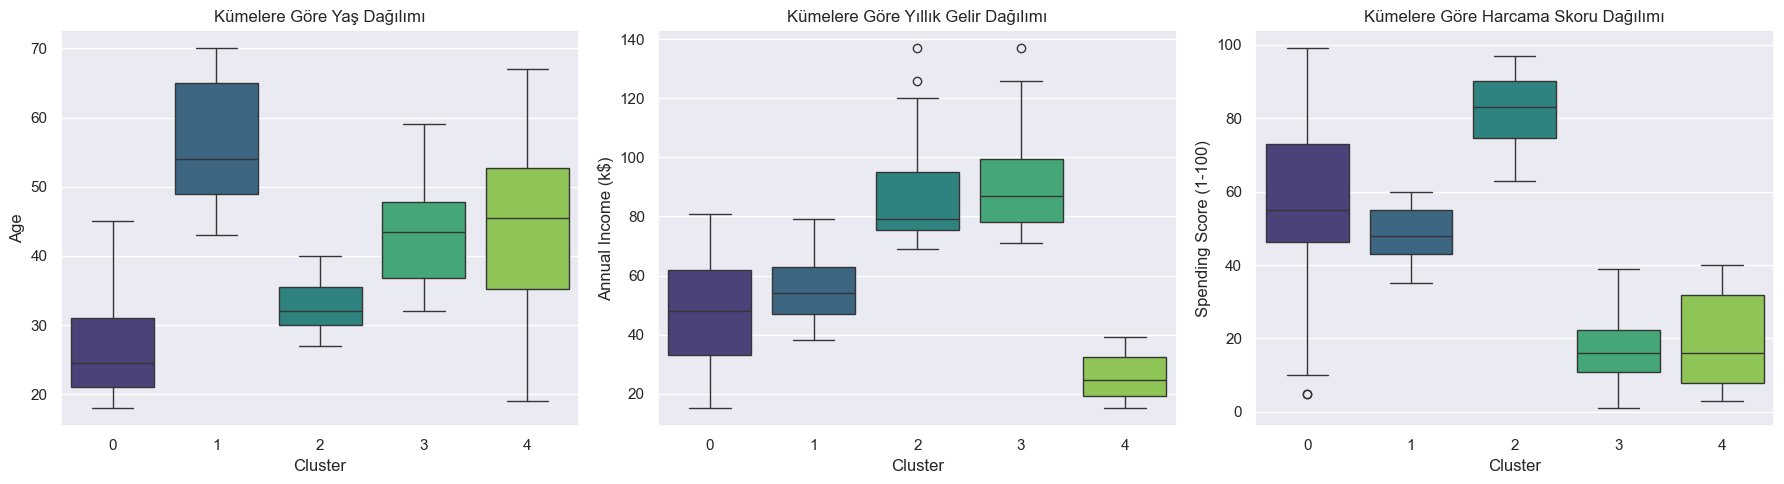

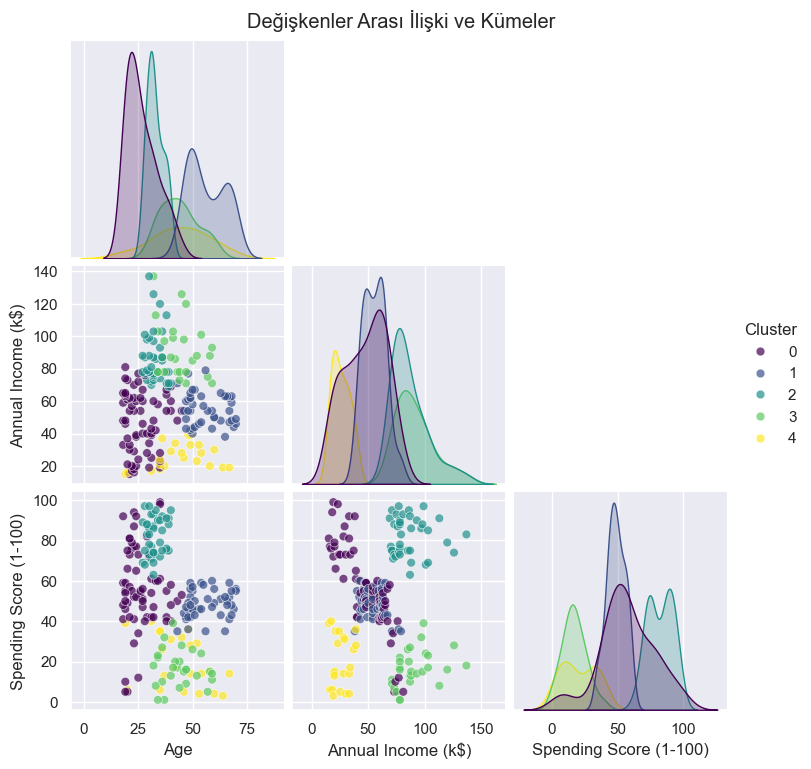

In [20]:

plt.figure(figsize=(18, 5))


plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='Age', data=df_final, palette='viridis')
plt.title('Kümelere Göre Yaş Dağılımı')


plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df_final, palette='viridis')
plt.title('Kümelere Göre Yıllık Gelir Dağılımı')


plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df_final, palette='viridis')
plt.title('Kümelere Göre Harcama Skoru Dağılımı')

plt.tight_layout()
plt.show()

sns.pairplot(
    df_final, 
    vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 
    hue='Cluster', 
    palette='viridis', 
    corner=True,
    plot_kws={'alpha': 0.7, 's': 40} 
)
plt.suptitle('Değişkenler Arası İlişki ve Kümeler', y=1.02) 
plt.show()

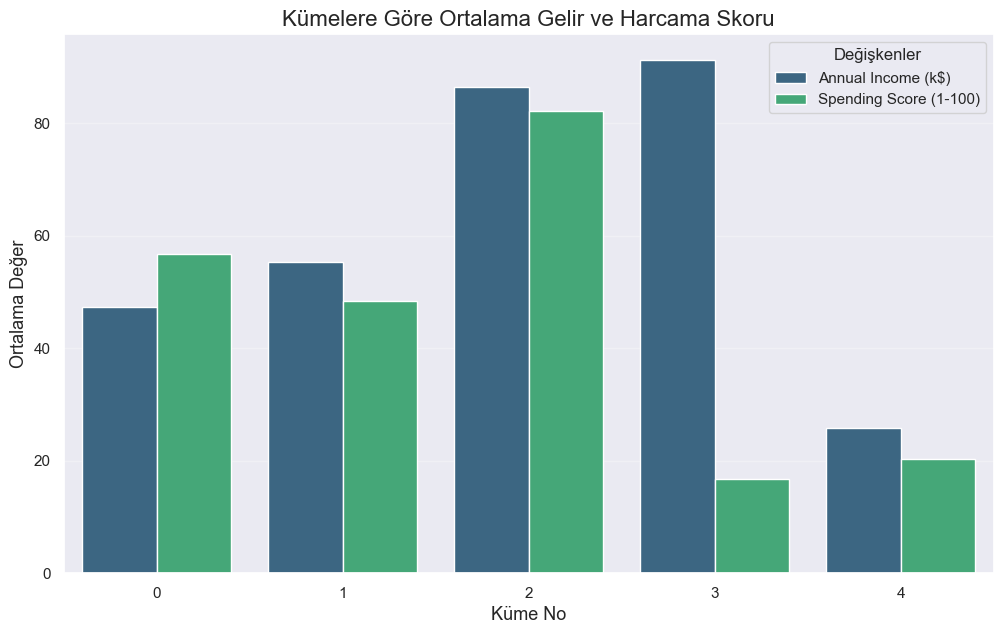

In [21]:
cluster_means = df_final.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().reset_index()
df_melted = cluster_means.melt(id_vars='Cluster', var_name='Metrik', value_name='Ortalama Değer')
plt.figure(figsize=(12, 7))
sns.barplot(
    x='Cluster', 
    y='Ortalama Değer', 
    hue='Metrik', 
    data=df_melted, 
    palette='viridis'
)

plt.title('Kümelere Göre Ortalama Gelir ve Harcama Skoru', fontsize=16)
plt.xlabel('Küme No', fontsize=13)
plt.ylabel('Ortalama Değer', fontsize=13)
plt.legend(title='Değişkenler', loc='upper right')
plt.grid(axis='y', alpha=0.3)

Bulgu: Veriler gösteriyor ki "Yüksek Harcama Skoru"na sahip "VIP" kitlenin %80'i 20-40 yaş aralığındadır.

Öneri: Pazarlama bütçesinin ağırlığı geleneksel medyadan dijital kanallara (Instagram, TikTok) ve deneyim odaklı etkinliklere kaydırılmalıdır.

Bulgu: Cluster 2, cironun ana taşıyıcısıdır ancak rekabete karşı hassastır.

Öneri: Bu gruba özel "VIP Lounge" erişimi, ücretsiz vale hizmeti veya kişisel alışveriş asistanı gibi ayrıcalıklar sunularak marka bağımlılığı yaratılmalıdır.

Bulgu: En yüksek gelire sahip olan Cluster 3 (40+ yaş), harcama konusunda en isteksiz gruptur.

Öneri: Bu kitleye "indirim" sunmak yerine; kalite, dayanıklılık ve prestij vurgusu yapan özel kampanyalar düzenlenmelidir. (Örn: "Torununuza bırakacağınız bir saat", "Evinizin değeri").

Bulgu: Düşük gelirli Cluster 4 grubu, marka reklamlarına değil, sadece fiyat avantajına tepki vermektedir.

Öneri: Bu segment için yüksek maliyetli imaj çalışmaları yapılmamalı; sadece seri sonu ve büyük indirim dönemlerinde SMS/Broşür ile hedeflenmelidir.

"Veri odaklı bu yeni segmentasyon stratejisi ile; doğru müşteriye, doğru zamanda, doğru teklifi sunarak toplam ciromuzda ve müşteri sadakatinde ölçülebilir bir artış hedefliyoruz."